# Advanced Regression
## Surprise Housing Assignment

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Essentially, the company wants —


- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

**So interpretation is important!**

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Following steps for final model:

1) Reading and understanding the data

2) Visualizing the data

3) Preparing the data for model training 

4) Splitting the Data into Training and Testing Sets

5) Building a models

6) Predictions and Comparision between Linear, Ridge and Lasso

# Step 1: Reading and Understanding the Data

Let us first import libraries for model building

In [1]:
#Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
pd.set_option('display.max_columns', 100)

import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split # It helps to split the data set into two part: Training and Test Data set
from sklearn.preprocessing import MinMaxScaler # It is used to scale the data variables or coloumns

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Library used to build linear model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [2]:
# Reading data from dataset
housing_data= pd.read_csv("train.csv")

In [3]:
# Check the head of the dataset
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Inspect various aspects of the surprise housing dataframe

In [4]:
#Shape of dataset
housing_data.shape

(1460, 81)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking if there are columns with one unique value since it won't affect our analysis
housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [8]:
#Identify and calculate the % of missing values in each column
missingdatacolumns = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
missingdatacolumns.loc[missingdatacolumns > 0].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [9]:
housing_data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
housing_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
housing_data.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [12]:
## Imputing the null values with proper data as those columns are useful in the analysis due to its business significance
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('No Pool')
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('None')
housing_data['Alley'] = housing_data['Alley'].fillna('No Alley Access')
housing_data['Fence'] = housing_data['Fence'].fillna('No Fence')
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('No Fireplace')
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)
housing_data['Electrical'] = housing_data['Electrical'].fillna("Other")

In [13]:
# Imputing the NaN Values with 'No Basement'
for var in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing_data[var] = housing_data[var].fillna('No Basement')

In [14]:
#Imputing the NaN values with 'No garage' 
for var in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing_data[var] = housing_data[var].fillna('No Garage')

In [15]:
#Identify and calculate the % of missing values in each column
missingdatacolumns = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
missingdatacolumns.loc[missingdatacolumns > 0].sort_values(ascending=False)

LotFrontage    17.74
dtype: float64

In [16]:
housing_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [17]:
## Dropping the LotFontgage column as it has 17.74% Null values and it doesn't hold any good significance in the analysis
housing_data.drop("LotFrontage",axis = 1, inplace=True)

In [18]:
housing_data.shape

(1460, 80)

In [19]:
#Confirming the missing values one more time after imputation and dropping unwanted variables
round((housing_data.isnull().sum()/len(housing_data.index) *100),2).sort_values(ascending=False)

Id             0.0
MSSubClass     0.0
GarageYrBlt    0.0
GarageType     0.0
FireplaceQu    0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 80, dtype: float64



# Step 2: Visualising the Data and performing EDA

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable


In [20]:
#Let's check the dependent variable i.e SalePrice
housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876


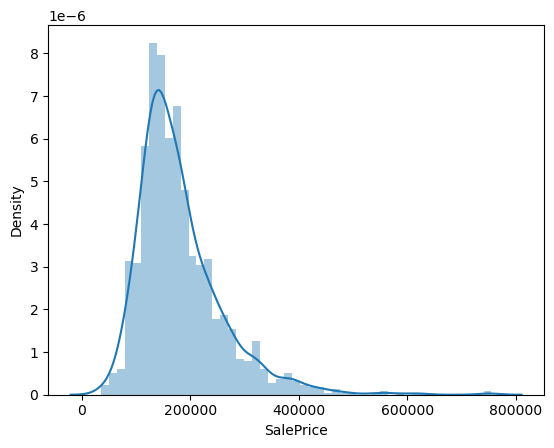

In [21]:
#Let's find out if the target variable is normally distributed??
sns.distplot(housing_data['SalePrice']) 
#skewness and kurtosis
print("Skewness: %f" % housing_data['SalePrice'].skew())

In [22]:
#Tranforming to form normal disribution
housing_data['SalePrice']=np.log(housing_data.SalePrice) 
housing_data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

Skewness: 0.121335


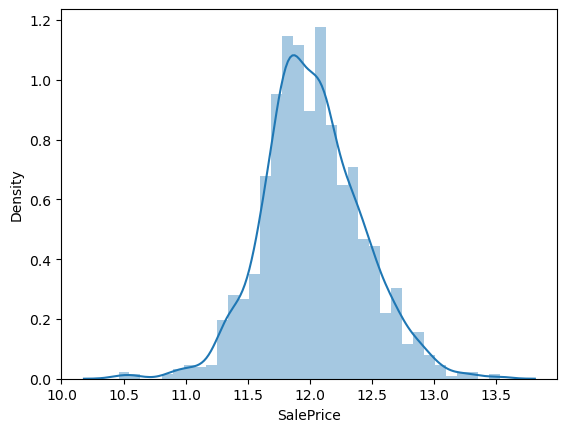

In [23]:
# Check if the data is now Normally distributed?
sns.distplot(housing_data['SalePrice'])

print("Skewness: %f" % housing_data['SalePrice'].skew())

### Visualising Numeric Variables


In [24]:
 #Get all numerical variables
NumericVars = housing_data.select_dtypes(include = np.number).columns.tolist()
NumericVars.remove('SalePrice')
NumericVars

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

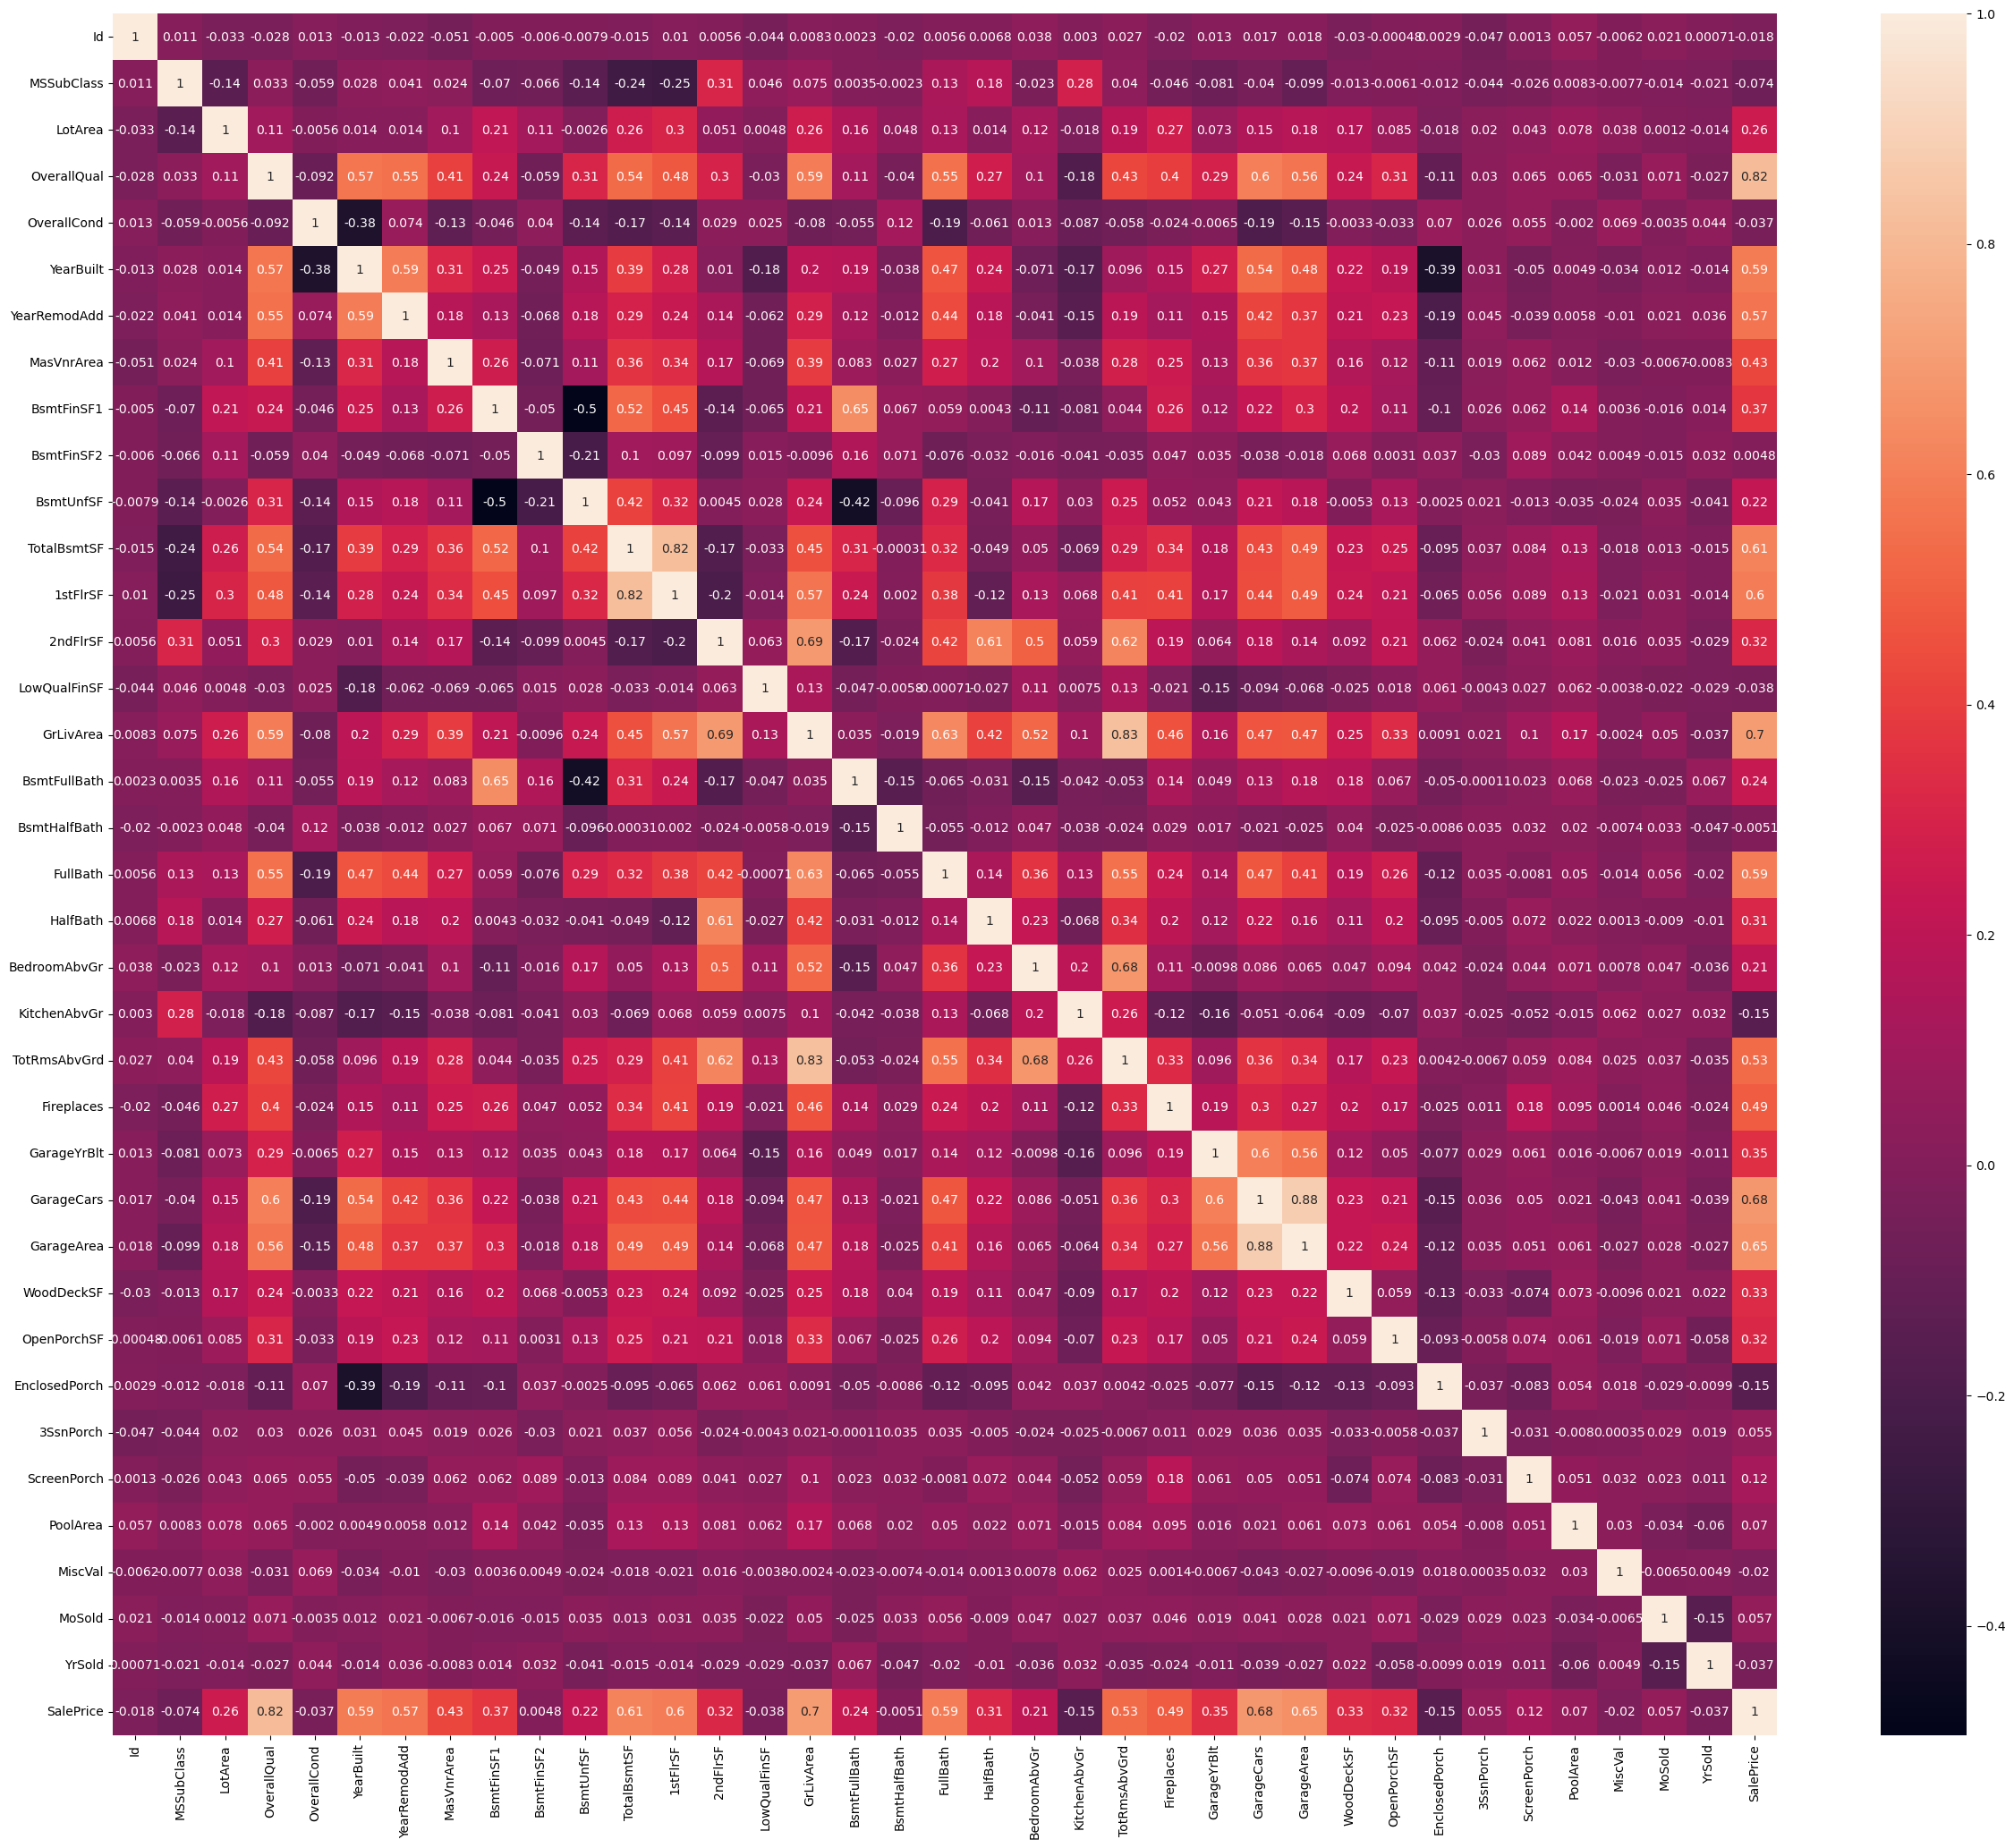

In [25]:
#Visualizing correlation matrix
plt.figure(figsize = (30, 25))
sns.heatmap(housing_data.corr(), annot = True)
plt.show()


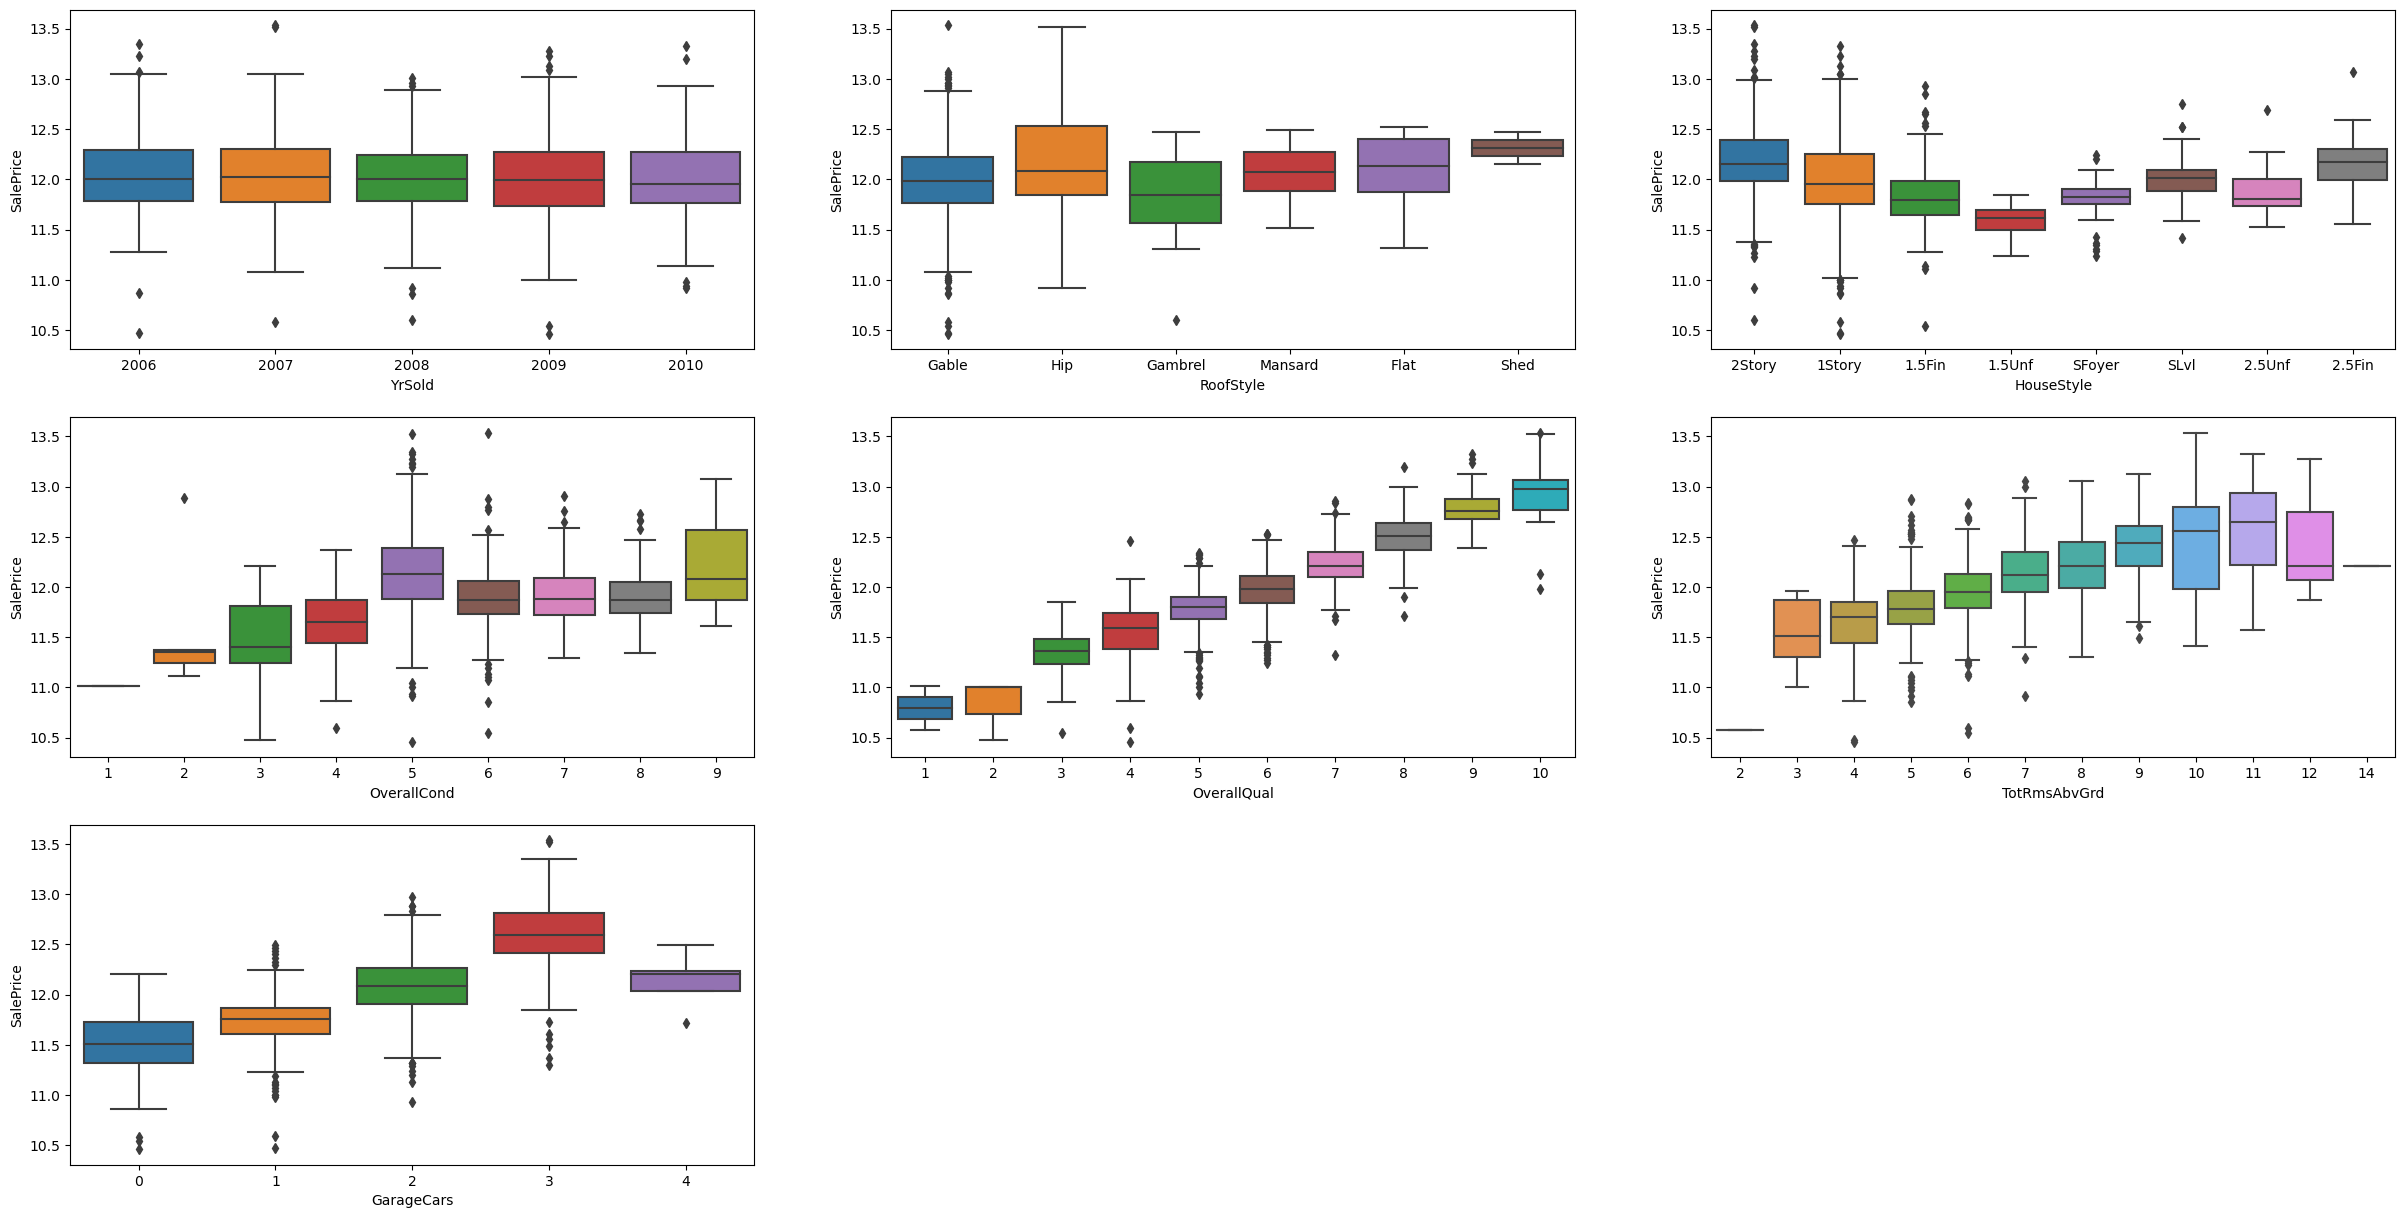

In [26]:
#visualizing the outliers and data distribution for few varaibles wrt to Target variable
plt.figure(figsize=(30, 15))

plt.subplot(3,3,1)
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = housing_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = housing_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = housing_data)
plt.show()

In [27]:
#Dropping the outliers from the numeric variables
for var in NumericVars:
        Q1 = housing_data[var].quantile(.25)
        Q3 = housing_data[var].quantile(.99)
        IQR = Q3-Q1
        housing_data =  housing_data[(housing_data[var] >= (Q1-(1.5*IQR))) & (housing_data[var] <= (Q3+(1.5*IQR)))] 

In [28]:
#Checking value count
housing_data.PoolArea.value_counts()

0    1361
Name: PoolArea, dtype: int64

In [29]:
#Dropping this variable as all the values are '0' , hence it is not a significant varaible
housing_data = housing_data.drop(['PoolArea'], axis = 1) 

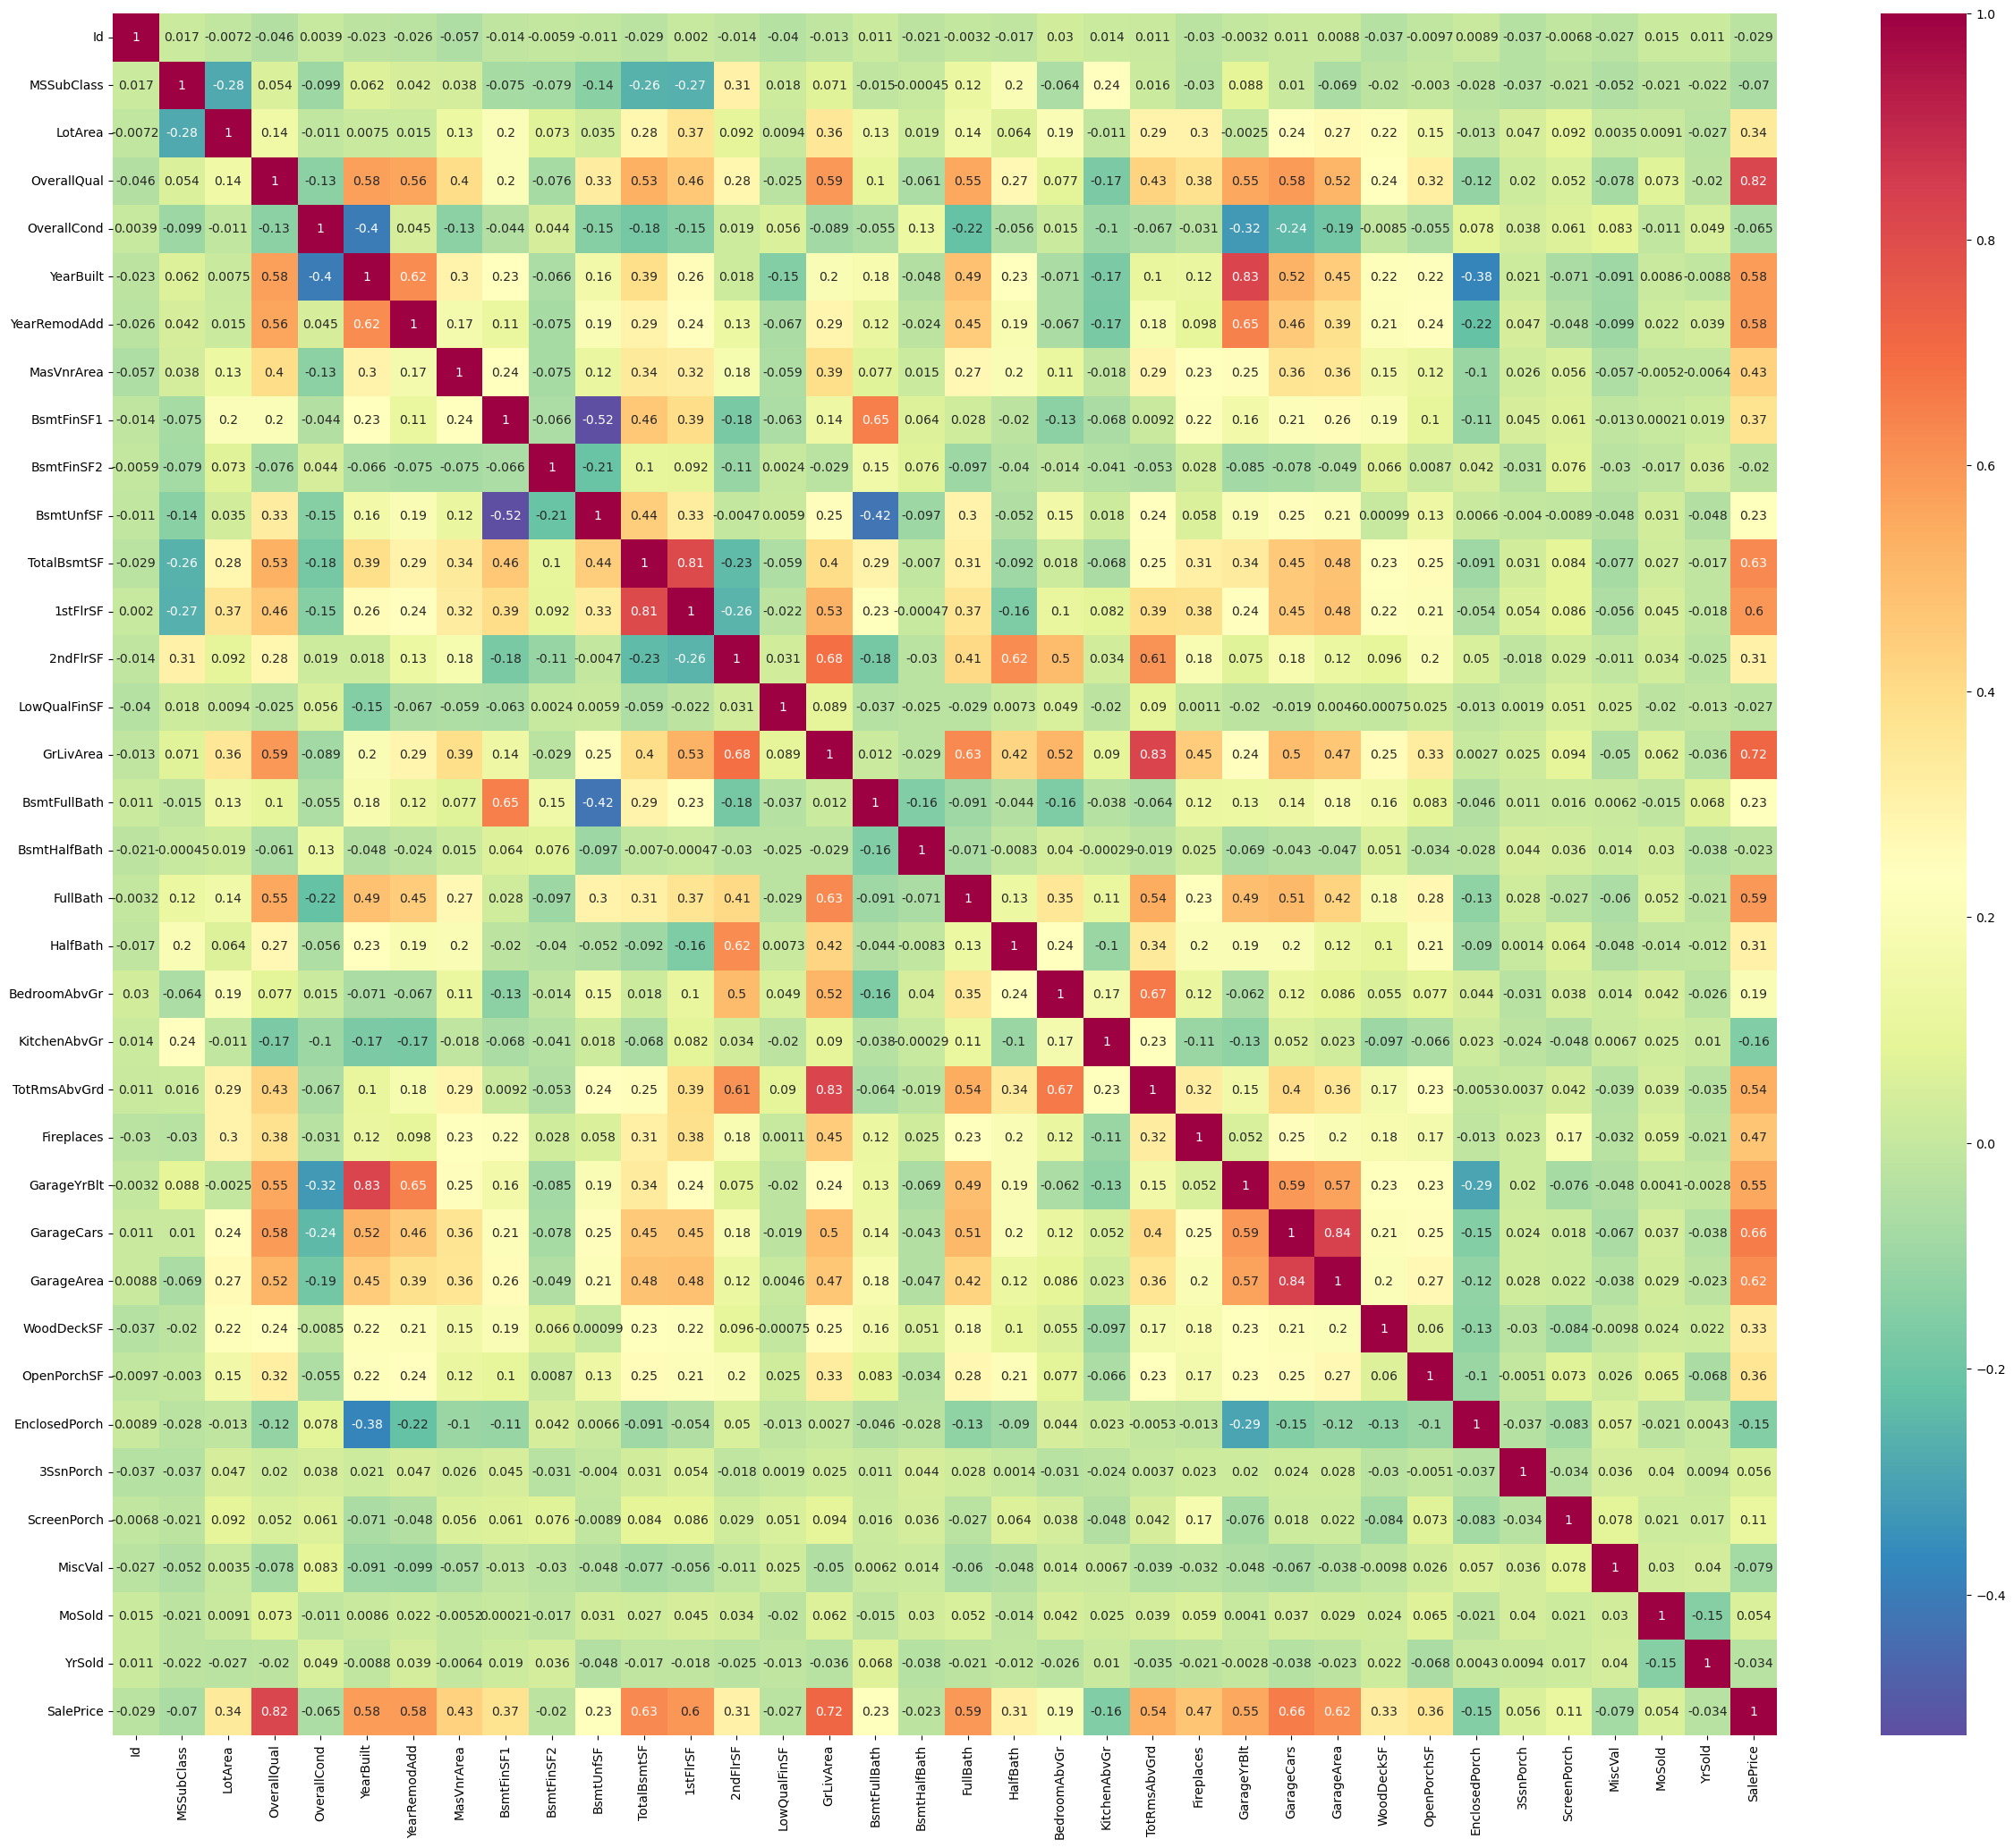

In [30]:
#Visualizing correlation matrix
plt.figure(figsize = (30, 25))
#sns.heatmap(housing_data.corr(), annot = True)
sns.heatmap(housing_data.corr(),cmap="Spectral_r",annot=True)
plt.show()

In [31]:
#Dropping the variables which has high degree of corelation
housing_data = housing_data.drop(['1stFlrSF'], axis = 1)
housing_data = housing_data.drop(['GarageYrBlt'], axis = 1)
housing_data = housing_data.drop(['GarageCars'], axis = 1)
housing_data = housing_data.drop(['YearRemodAdd'], axis = 1) 
housing_data = housing_data.drop(['BsmtFinSF1'], axis = 1) 
housing_data = housing_data.drop(['2ndFlrSF'], axis = 1) 
housing_data = housing_data.drop(['BsmtFullBath'], axis = 1) 

In [32]:
#list of datatype in corelation table 
corr_var = housing_data[list(housing_data.dtypes[housing_data.dtypes != 'object'].index)].corr()
#printing highly corelated data columns
corr_coef = corr_var[corr_var['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.817905
GrLivArea       0.717266
TotalBsmtSF     0.629986
GarageArea      0.621569
FullBath        0.592917
YearBuilt       0.582726
TotRmsAbvGrd    0.541165
Name: SalePrice, dtype: float64


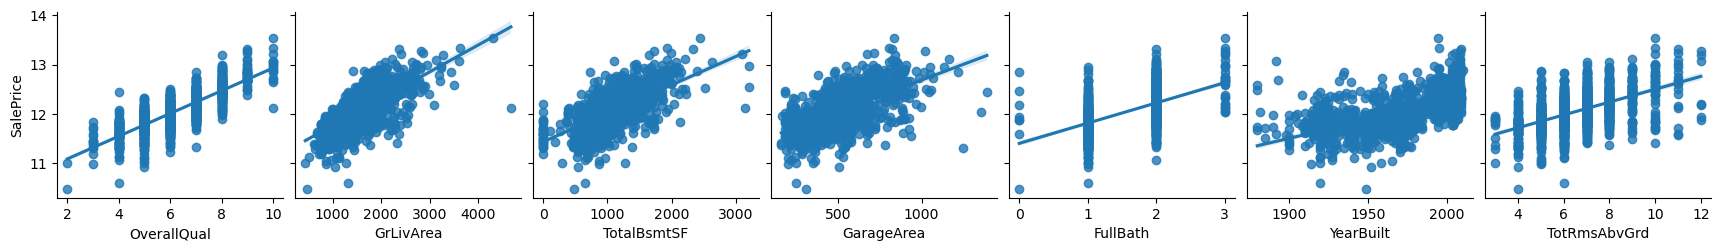

In [33]:
#plotting pairplot to check skewness visually
#pairplot of corr features having corelation >0.5
sns.pairplot(housing_data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

In [34]:
#Getting all the numeric variables one more time after removing the unwanted numeric variables
NumericVars = housing_data.select_dtypes(include = np.number).columns.tolist()

### Visualising Categorical Variables


In [35]:
#Get all categorical variables
CategoricalVars = housing_data.select_dtypes(include = np.object).columns.tolist()
for var in CategoricalVars:
    print(var,' : ',housing_data[var].unique())
    print(housing_data[var].value_counts())

MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1083
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64
Street  :  ['Pave' 'Grvl']
Pave    1357
Grvl       4
Name: Street, dtype: int64
Alley  :  ['No Alley Access' 'Grvl' 'Pave']
No Alley Access    1279
Grvl                 43
Pave                 39
Name: Alley, dtype: int64
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
Reg    853
IR1    461
IR2     39
IR3      8
Name: LotShape, dtype: int64
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1231
Bnk      53
HLS      47
Low      30
Name: LandContour, dtype: int64
Utilities  :  ['AllPub' 'NoSeWa']
AllPub    1360
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     980
Corner     244
CulDSac     89
FR2         44
FR3          4
Name: LotConfig, dtype: int64
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Gtl    1292
Mod      61
Sev       8
Name: LandSlope, dtype: int64
Neighborhood  :  ['CollgCr' 'Veenke

In [36]:
#Dropping following variables as only one value has maximum concentration so it would not be of any use in analysis
housing_data = housing_data.drop(['PoolQC'], axis = 1) 
housing_data = housing_data.drop(['Condition2'], axis = 1) 
housing_data = housing_data.drop(['RoofMatl'], axis = 1) 
housing_data = housing_data.drop(['BsmtFinType2'], axis = 1) 
housing_data = housing_data.drop(['Heating'], axis = 1) 
housing_data = housing_data.drop(['Functional'], axis = 1) 
housing_data = housing_data.drop(['GarageQual'], axis = 1) 
housing_data = housing_data.drop(['GarageCond'], axis = 1) 
housing_data = housing_data.drop(['MiscFeature'], axis = 1) 
housing_data = housing_data.drop(['PavedDrive'], axis = 1) 

In [37]:
#Dropping ID variable
housing_data = housing_data.drop(['Id'], axis = 1) 

# Step 3: Data Preparation

## Dummy Variables

In [38]:
#Getting all categorical variables once again after removing the unwanted variables
CategoricalVars = housing_data.select_dtypes(include = np.object).columns.tolist()

#Creating the dummy variables
housing_data_dummy_var = pd.get_dummies(data=housing_data, columns = CategoricalVars, drop_first=True)
housing_data_dummy_var.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,196.0,0,150,856,0,1710,0,2,1,3,1,8,0,548,0,61,0,0,0,0,2,2008,12.247694,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,0.0,0,284,1262,0,1262,1,2,0,3,1,6,1,460,298,0,0,0,0,0,5,2007,12.109011,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,162.0,0,434,920,0,1786,0,2,1,3,1,6,1,608,0,42,0,0,0,0,9,2008,12.317167,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,0.0,0,540,756,0,1717,0,1,0,3,1,7,1,642,0,35,272,0,0,0,2,2006,11.849398,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,350.0,0,490,1145,0,2198,0,2,1,4,1,9,1,836,192,84,0,0,0,0,12,2008,12.429216,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Step 4: Splitting the Data into Training and Testing Sets


In [39]:
#X Independent variables and y target variable
X = housing_data_dummy_var.drop(['SalePrice'], axis=1)
y = housing_data_dummy_var['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [40]:
#Verifying the data rows in each data set
print("Total: ",housing_data_dummy_var.shape)
print("X Train: ",X_train.shape)
print("X Test: ",X_test.shape)
print("y Train: ",y_train.shape)# Step 4: Splitting the Data into Training and Testing Sets
print("y Test: ",y_test.shape)

Total:  (1361, 198)
X Train:  (952, 197)
X Test:  (409, 197)
y Train:  (952,)
y Test:  (409,)


# Step 5: Building Models

### Linear Regression

In [41]:

#Linear Regression Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("Train R2 Score:",r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print("Test R2 Score:",r2_test_lr)
metric1.append(r2_test_lr)

rssTrain_lr = np.sum(np.square(y_train - y_pred_train_lr))
print("Train RSS:",rssTrain_lr)
metric1.append(rssTrain_lr)

rssTest_lr = np.sum(np.square(y_test - y_pred_test_lr))
print("Test RSS:",rssTest_lr)
metric1.append(rssTest_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Train MSE:",mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print("Test MSE:",mse_test_lr)
metric1.append(mse_test_lr**0.5)

Train R2 Score: 0.9293434856317219
Test R2 Score: 0.9118604959451762
Train RSS: 8.808444848058167
Test RSS: 6.144919545842165
Train MSE: 0.009252568117708158
Test MSE: 0.015024253168318251


### Ridge Regression

In [43]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 



Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [44]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003445,0.006889,0.003601,0.005822,0.0,{'alpha': 1e-08},0.882411,0.906716,0.901888,0.724876,0.857643,0.854707,0.067176,30,0.929328,0.928176,0.927258,0.952249,0.936197,0.934642,0.009349
1,0.006274,0.004208,0.003265,0.002754,0.0,{'alpha': 1e-07},0.882411,0.906716,0.901888,0.724876,0.857643,0.854707,0.067176,29,0.929328,0.928176,0.927258,0.952249,0.936197,0.934642,0.009349
2,0.004148,0.002189,0.001401,0.001200,0.000001,{'alpha': 1e-06},0.882412,0.906716,0.901888,0.724876,0.857644,0.854707,0.067176,28,0.929328,0.928176,0.927258,0.952249,0.936197,0.934642,0.009349
3,0.005751,0.005232,0.001620,0.000810,0.00001,{'alpha': 1e-05},0.882412,0.906717,0.901890,0.724877,0.857644,0.854708,0.067176,27,0.929328,0.928176,0.927258,0.952249,0.936197,0.934642,0.009349
4,0.006960,0.007040,0.000410,0.000819,0.0001,{'alpha': 0.0001},0.882413,0.906721,0.901901,0.724883,0.857653,0.854714,0.067176,26,0.929328,0.928176,0.927258,0.952249,0.936197,0.934642,0.009349


In [45]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha_ridge = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=alpha_ridge)

ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [46]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_Ridge = r2_score(y_train, y_pred_train_ridge)
print("Train R2_Scrore:",r2_train_Ridge)
metric2.append(r2_train_Ridge)

r2_test_Ridge = r2_score(y_test, y_pred_test_ridge)
print("Test R2_Scrore:",r2_test_Ridge)
metric2.append(r2_test_Ridge)

rssTrain_Ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print("RSS Train:",rssTrain_Ridge)
metric2.append(rssTrain_Ridge)

rssTest_Ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS Test",rssTest_Ridge)
metric2.append(rssTest_Ridge)

mse_train_Ridge = mean_squared_error(y_train, y_pred_train_ridge)
print("MSE Train",mse_train_Ridge)
metric2.append(mse_train_Ridge**0.5)

mse_test_Ridge = mean_squared_error(y_test, y_pred_test_ridge)
print("MSE Test",mse_test_Ridge)
metric2.append(mse_test_Ridge**0.5)

Train R2_Scrore: 0.9200872068397271
Test R2_Scrore: 0.9146625075981272
RSS Train: 9.962385457307084
RSS Test 5.949568592163249
MSE Train 0.010464690606415004
MSE Test 0.01454662247472677


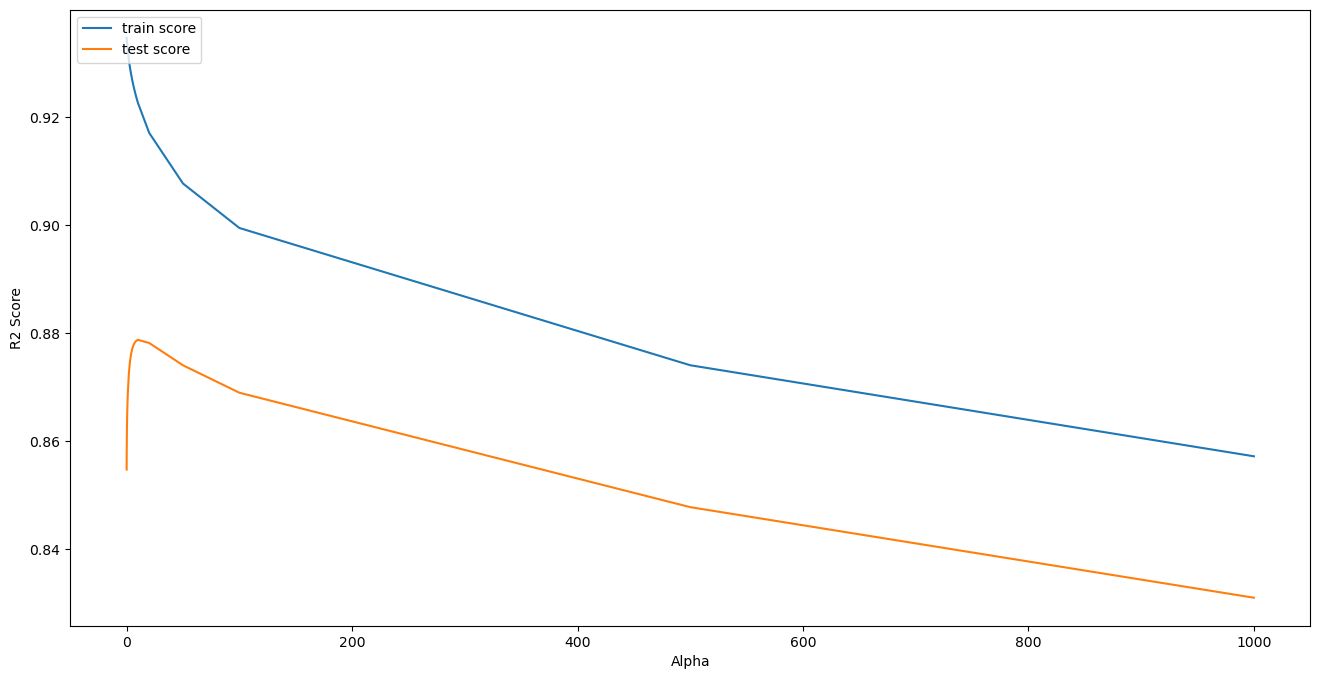

In [47]:
# plotting mean test and train scores with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Lasso Regression

In [48]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053222,0.004366,0.002306,0.000402,0.0,{'alpha': 1e-08},-0.084250,-0.090370,-0.087942,-0.096477,-0.097717,-0.091351,0.005095,6,-0.067830,-0.065231,-0.068171,-0.059439,-0.063434,-0.064821,0.003204
1,0.051602,0.002364,0.001600,0.000800,0.0,{'alpha': 1e-07},-0.084197,-0.090364,-0.087924,-0.096463,-0.097707,-0.091331,0.005107,5,-0.067829,-0.065232,-0.068172,-0.059441,-0.063433,-0.064821,0.003204
2,0.054606,0.006536,0.001003,0.001269,0.000001,{'alpha': 1e-06},-0.083906,-0.090301,-0.087747,-0.096334,-0.097596,-0.091177,0.005162,4,-0.067821,-0.065243,-0.068179,-0.059462,-0.063431,-0.064827,0.003197
3,0.055936,0.007410,0.001800,0.000980,0.00001,{'alpha': 1e-05},-0.083143,-0.089818,-0.086053,-0.095305,-0.096429,-0.090150,0.005138,3,-0.067774,-0.065334,-0.068254,-0.059705,-0.063449,-0.064903,0.003124
4,0.027172,0.006198,0.003126,0.006251,0.0001,{'alpha': 0.0001},-0.078684,-0.087146,-0.079388,-0.090919,-0.089394,-0.085106,0.005105,2,-0.068241,-0.066692,-0.069060,-0.061783,-0.064965,-0.066148,0.002593


In [50]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [51]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha_lasso=model_cv_lasso.best_params_['alpha']

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_Lasso = r2_score(y_train, y_pred_train_lasso)
print("Train R2 Score:",r2_train_Lasso)
metric3.append(r2_train_Lasso)

r2_test_Lasso = r2_score(y_test, y_pred_test_lasso)
print("Test R2 Score:",r2_test_Lasso)
metric3.append(r2_test_Lasso)

rssTrain_Lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print("Train RSS:",rssTrain_Lasso)
metric3.append(rssTrain_Lasso)

rssTest_Lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("Test RSS:",rssTest_Lasso)
metric3.append(rssTest_Lasso)

mse_train_Lasso = mean_squared_error(y_train, y_pred_train_lasso)
print("Train MSE:",mse_train_Lasso)
metric3.append(mse_train_Lasso**0.5)

mse_test_Lasso = mean_squared_error(y_test, y_pred_test_lasso)
print("Test MSE:",mse_test_Lasso)
metric3.append(mse_test_Lasso**0.5)

Train R2 Score: 0.9072886157819771
Test R2 Score: 0.915476347689298
Train RSS: 11.557930956161405
Test RSS: 5.89282920002514
Train MSE: 0.012140683777480468
Test MSE: 0.014407895354584695


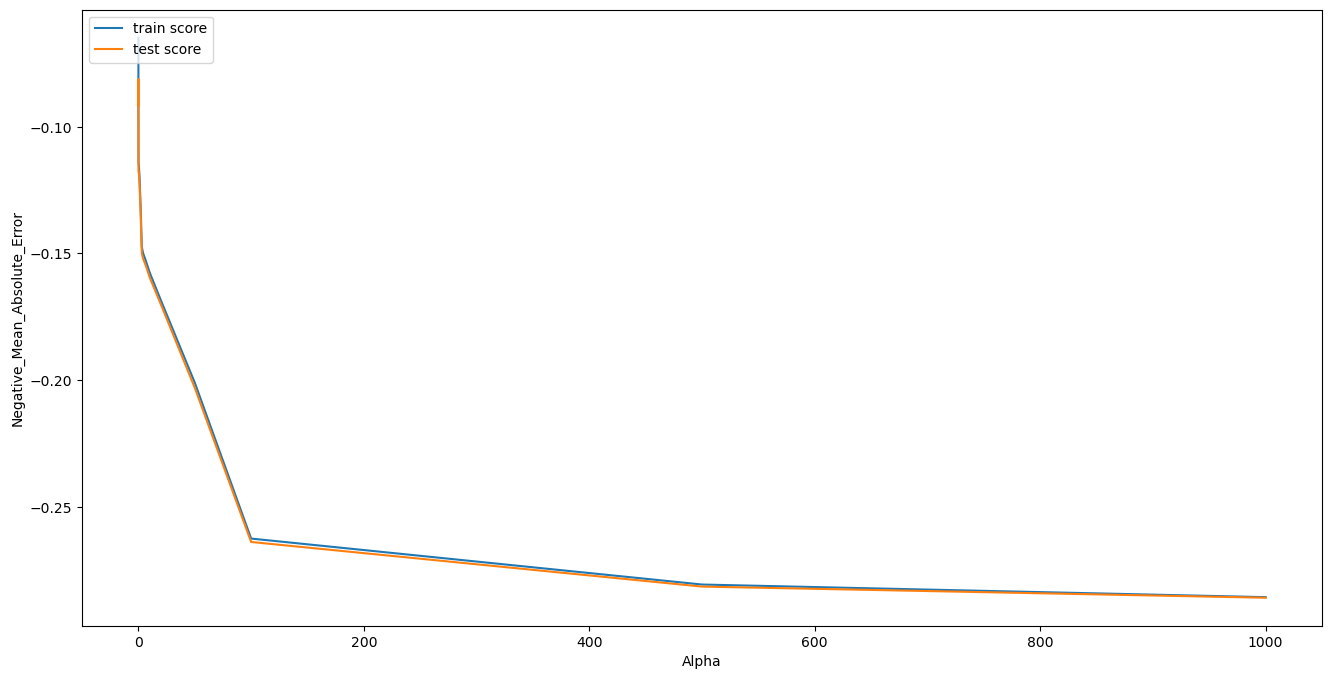

In [53]:
# plotting mean test and train scores with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))

plt.plot(cv_results_lasso['param_alpha'],cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'],cv_results_lasso['mean_test_score'])
plt.ylabel('Negative_Mean_Absolute_Error')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Step 6:Predictions and Comparision between Linear, Ridge and Lasso

Text(0, 0.5, 'Sales Price')

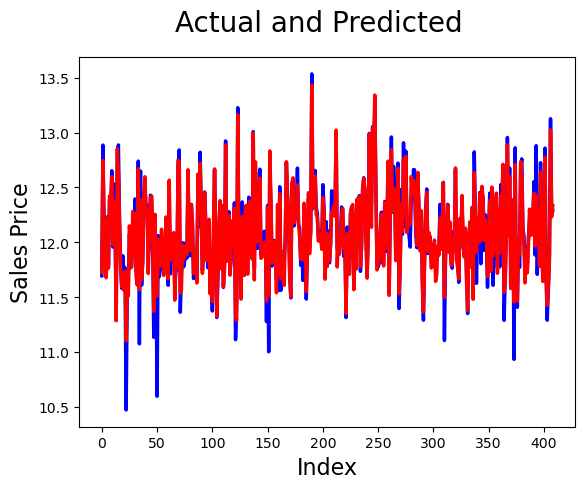

In [54]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 

Text(0, 0.5, 'Sales Price')

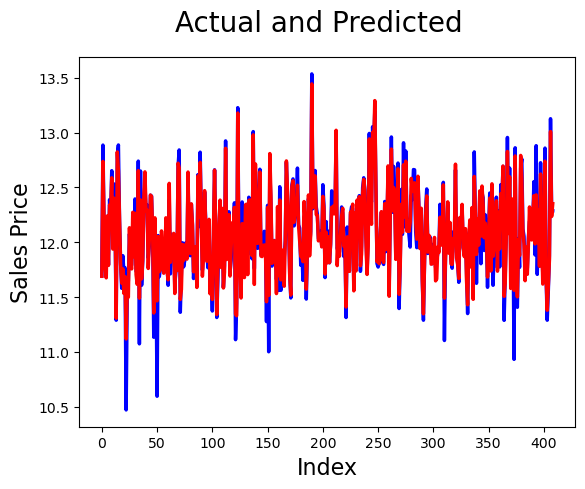

In [55]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 

In [56]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_headings = pd.DataFrame(lr_table ,columns = ['Metric'] )
lr_metric = pd.Series(metric1, name = 'Linear Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_headings,lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.929343,0.920087,0.907289
1,R2 Score (Test),0.911860,0.914663,0.915476
2,RSS (Train),8.808445,9.962385,11.557931
3,RSS (Test),6.144920,5.949569,5.892829
4,MSE (Train),0.096190,0.102297,0.110185
5,MSE (Test),0.122573,0.120609,0.120033


## Lets observe the changes in the coefficients after regularization

In [57]:
betas = pd.DataFrame(index=X_train.columns)

In [58]:
betas.rows = X_train.columns

In [59]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [60]:
pd.set_option('display.max_rows', None)
betas.head(197)

,Linear,Ridge,Lasso
MSSubClass,-6.861618e-04,-0.000415,-0.000421
LotArea,2.951169e-06,0.000003,0.000004
OverallQual,3.505719e-02,0.049077,0.057112
OverallCond,4.439127e-02,0.046880,0.048657
YearBuilt,1.221975e-03,0.002051,0.002551
MasVnrArea,-8.564578e-06,-0.000016,-0.000005
BsmtFinSF2,-1.875245e-05,-0.000038,-0.000050
BsmtUnfSF,-6.362672e-05,-0.000071,-0.000076
TotalBsmtSF,1.220881e-04,0.000136,0.000152
LowQualFinSF,-1.442652e-04,-0.000059,-0.000030


# Conclusion

## The top 5 most important predictor variables as per the Lasso model
1. OverallQual 0.065212 
2. OverallCond 0.047781 
3. Neighborhood_NridgHt 0.043734 
4. Neighborhood_Crawfor 0.043238 
5. Condition1_Norm 0.039909

## Ridge’s stats are:
<li>Train R2_Scrore: 0.9200872068397271
<li>Test R2_Scrore: 0.9146625075981272
<li>RSS Train: 9.962385457307084
<li>RSS Test 5.949568592163249
<li>MSE Train 0.010464690606415004
<li>MSE Test 0.01454662247472677
    
## Lasso's stats are:
<li>Train R2 Score: 0.9072886157819771
<li>Test R2 Score: 0.915476347689298
<li>Train RSS: 11.557930956161405
<li>Test RSS: 5.89282920002514
<li>Train MSE: 0.012140683777480468
<li>Test MSE: 0.014407895354584695

#### As per the above observed stats it looks like both the models has achieved a good accuracy , as the R2 score is in the range of 90 92 for the bo th the models. We can c hoose Lasso in this case, as it helps in feature elimination by decreasing the model complexity